In [1]:
!pip uninstall tensorflow

Uninstalling tensorflow-1.14.0:
  Would remove:
    /usr/local/bin/freeze_graph
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-1.14.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? n


In [2]:
!pip install tensorflow==2.0.0-beta1

     |████████████████████████████████| 87.9MB 1.3MB/s 
     |████████████████████████████████| 501kB 39.7MB/s 
     |████████████████████████████████| 3.1MB 37.2MB/s 
  Found existing installation: tensorflow 1.14.0
    Uninstalling tensorflow-1.14.0:
      Successfully uninstalled tensorflow-1.14.0


In [3]:

import tensorflow as tf
print(tf.__version__)

2.0.0-beta1


In [0]:
import tensorflow_datasets as tfds


In [5]:
imdb,info = tfds.load("imdb_reviews/subwords8k",with_info = True,as_supervised=True)

W0706 17:33:20.245584 140246639605632 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow_datasets/core/file_format_adapter.py:209: tf_record_iterator (from tensorflow.python.lib.io.tf_record) is deprecated and will be removed in a future version.
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/0.1.0. Subsequent calls will reuse this data.


In [6]:
imdb

{'test': <_OptionsDataset shapes: ((None,), ()), types: (tf.int64, tf.int64)>,
 'train': <_OptionsDataset shapes: ((None,), ()), types: (tf.int64, tf.int64)>,
 'unsupervised': <_OptionsDataset shapes: ((None,), ()), types: (tf.int64, tf.int64)>}

In [0]:
train_data,test_data = imdb["train"],imdb["test"]

In [0]:
tokenizer = info.features["text"].encoder

In [9]:
print(tokenizer.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [0]:
sample_string = "Hi, I am Debanik Roy"

In [11]:
tokenized_string = tokenizer.encode(sample_string)
print("Tokenized string is {}".format(tokenized_string))

Tokenized string is [1052, 2, 12, 258, 893, 1378, 5047, 7961, 3728]


In [12]:
original_string = tokenizer.decode(tokenized_string)
print("The Tokenized original string is: {}",format(original_string))

The Tokenized original string is: {} Hi, I am Debanik Roy


In [13]:
embedding_dim = 64
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size,embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [0]:
num_epoch = 10
model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

In [15]:
history = model.fit(train_data,
                   epochs=num_epoch,
                   validation_data=test_data)

Epoch 1/10


W0706 17:35:22.105402 140246639605632 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


25000/25000 [==============================] - 513s 21ms/step - loss: 0.6855 - accuracy: 0.5310 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
25000/25000 [==============================] - 261s 10ms/step - loss: 0.6834 - accuracy: 0.5337 - val_loss: 0.6842 - val_accuracy: 0.5342
Epoch 3/10
25000/25000 [==============================] - 262s 10ms/step - loss: 0.6826 - accuracy: 0.5365 - val_loss: 0.6841 - val_accuracy: 0.5352
Epoch 4/10
25000/25000 [==============================] - 260s 10ms/step - loss: 0.6820 - accuracy: 0.5382 - val_loss: 0.6842 - val_accuracy: 0.5362
Epoch 5/10
25000/25000 [==============================] - 264s 11ms/step - loss: 0.6816 - accuracy: 0.5401 - val_loss: 0.6843 - val_accuracy: 0.5373
Epoch 6/10
25000/25000 [==============================] - 265s 11ms/step - loss: 0.6813 - accuracy: 0.5420 - val_loss: 0.6846 - val_accuracy: 0.5371
Epoch 7/10
25000/25000 [==============================] - 266s 11ms/step - loss: 0.6811 - accuracy: 0.5427 - 

In [0]:
import matplotlib.pyplot as plt 

def plot_graphs(history,string):
  plt.plot(history.history[string])
  plt.plot(history.history["val_"+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string,"val_"+string])
  plt.show()
  


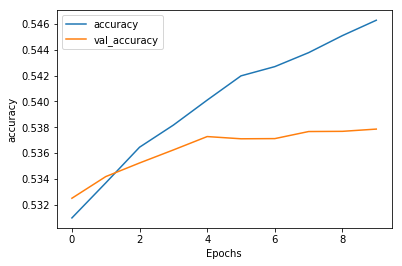

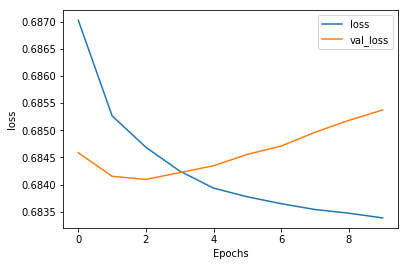

In [23]:
plot_graphs(history,"accuracy")

plot_graphs(history,"loss")